Collecting data to chart Prime Minister Age

c:\users\admin\desktop\km\analysis-election-msia\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


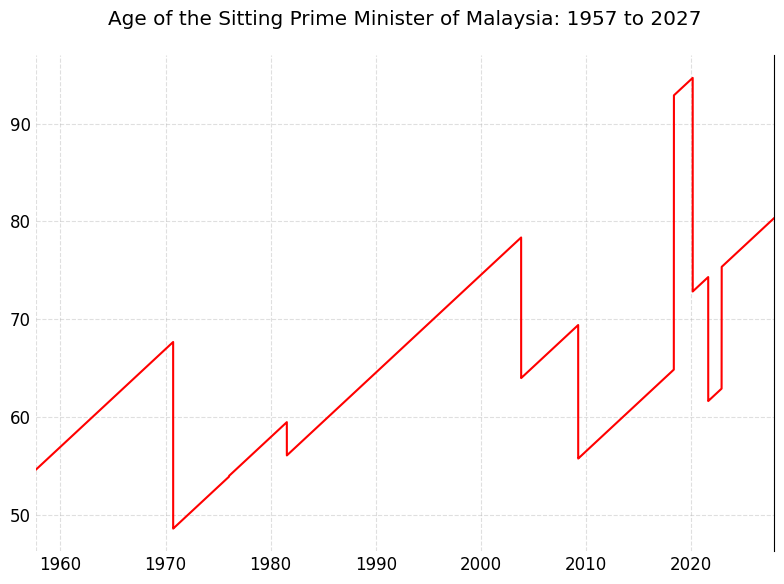

In [13]:
import pandas as pd
from datetime import timedelta

data = [
    ['1957-08-31',''],
    ['1970-09-22','1903-02-08'],
    ['1976-01-14','1922-03-11'],
    ['1981-07-16','1922-02-12'],
    ['2003-10-30','1925-07-10'],
    ['2009-04-03','1939-11-26'],
    ['2018-05-09','1953-07-23'],
    ['2020-02-24','1925-07-10'],
    ['2021-08-16','1947-05-15'],
    ['2022-11-24','1960-01-18'],
    ['2027-11-19','1947-08-10']
]

tf = pd.DataFrame(data,columns=['date','birthday'])
for c in tf.columns: tf[c] = pd.to_datetime(tf[c]).dt.date

sdate,edate = tf.date.iloc[0], tf.date.iloc[-1] + timedelta(1)
df = pd.DataFrame(columns=['date'])
df.date = [sdate + timedelta(x) for x in range((edate-sdate).days)]

df = pd.merge(df,tf,on='date',how='left').bfill()
for c in df.columns: df[c] = pd.to_datetime(df[c])
df['age'] = (df.date-df.birthday).dt.days/365
df = df.set_index('date')

darkmode = 0

if darkmode == 0:
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'font.size': 12,
                        'font.family': 'sans-serif',
                        'grid.linestyle': 'dashed',
                        'figure.autolayout': True,
                        'figure.figsize': [8,6]})
    fig, ax = plt.subplots(facecolor='white')

    df['age'].plot(ax=ax, color='red')
    for p in ['top','bottom','left']: ax.spines[p].set_visible(False)
    ax.set_xlabel('')
    ax.yaxis.grid(True, alpha=0.4)
    ax.xaxis.grid(True, alpha=0.4)
    ax.tick_params(axis=u'both', which=u'both',length=0, colors='black')
    ax.set_title('Age of the Sitting Prime Minister of Malaysia: 1957 to 2027\n', color='black')
    plt.show()
else:
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'font.size': 12,
                        'font.family': 'sans-serif',
                        'grid.linestyle': 'dashed',
                        'figure.autolayout': True,
                        'figure.figsize': [8,6]})
    fig, ax = plt.subplots(facecolor='black')

    df['age'].plot(ax=ax, color='blue')
    ax.set_xlabel('')
    # for p in ['top','bottom','right','left']: ax.spines[p].set_visible(False)
    ax.yaxis.grid(True, alpha=0.4)
    ax.xaxis.grid(True, alpha=0.4)
    ax.set_facecolor('black')
    ax.tick_params(axis=u'both', which=u'both',length=0, colors='white')
    ax.set_title('Age of the Sitting Prime Minister of Malaysia: 1957 to 2027\n', color='white')
    plt.show()

In [ ]:
df['age'].to_csv("pm_age.csv")